<center><h1 style="font-size:40px">Credit Card Fraud Detection</h1><center>

## Content

1. [Introduction](#1)
    - [Data Description](#des)   
2. [Importing Important Libraries](#2)
3. [Understanding the Data](#3)
4. [Data Preprocessig](#4)
    - [Feature Scaling](#scl)
    - [Target Imbalance](#timb)
5. [Model Training, Testing and Tuning](#5)
    - [Logistic Regression](#log)
    - [Random Forests](#rf)
    - [XGBoost](#xgb)
6. [Conclusion](#6)

<a id="1"></a>
# 1. Introduction

It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.

<a id="des"></a>
## Data Description

1. The dataset contains transactions made by credit cards in September 2013 by European cardholders. 
2. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.
3. It contains only numerical input variables which are the result of a PCA transformation. This is due to confidentiality issues. 
4. The only features which are not transformed are `Time` and `Amount`.


<a id="2"></a>
# 2. Importing Important Libraries

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"] = (10,6)
matplotlib.rcParams["font.size"] = 14
sns.set_style("darkgrid")

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from imblearn.over_sampling import SMOTE
from sklearn.metrics import precision_recall_curve, classification_report, confusion_matrix


import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

<a id="3"></a>
# 3. Understanding the Data

In [2]:
data = pd.read_csv('./creditcardfraud/creditcard.csv')

In [3]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
data.shape

(284807, 31)

In [5]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [6]:
# Checking the data types
data.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [7]:
# Checking for missing values
data.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

As we know that there is an imabalance in our target feature. Let's plot it and see how significant it is.

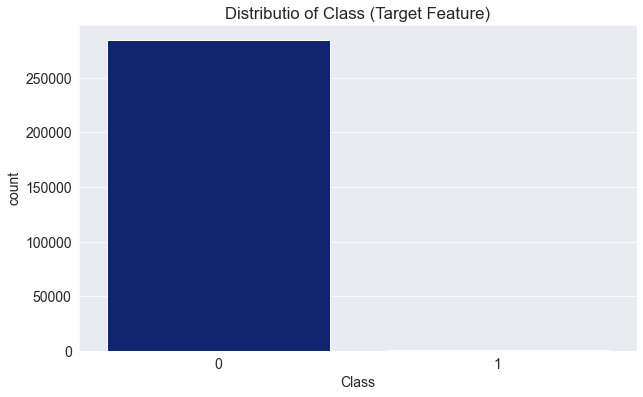

In [8]:
sns.countplot(data=data, x=data.Class, palette="dark")
plt.title("Distributio of Class (Target Feature)");

As it is evident from the above plot that our target feature is heavily imbalanced. If we use this data to train our model, the algorithms will become bias and will classify new observations to the majority class. As the data is imabalanced, accuracy will tell us nothing.

To address this problem, we can use either **undersampling** or **oversampling** of data techniques. 

1. Undersampling is reducing the data points of the majority class. This however results in information loss from the training set.
2. Oversampling is increasing the data points of minority class. This also makes sure that there is no information loss in the original training set. However it is prone to overfitting.

There is a type of oversampling called SMOTE (Synthetic Minority Oversampling Technique), which we are going to use to make our dataset balanced. It creates synthetic points from the minority class.


Let's first see the distribution of `Time` and `Amount` Columns and check how skewed they are. All other columns have undergone PCA transformation, which means they were previously scaled.

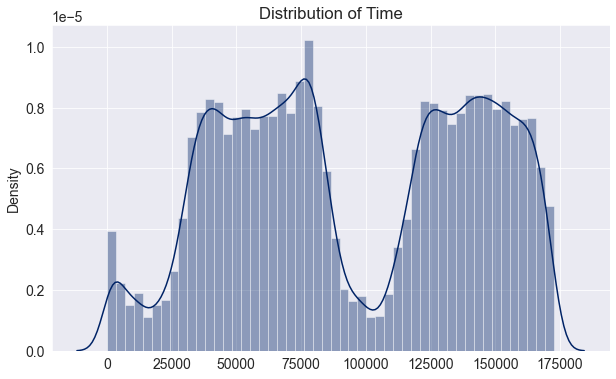

In [9]:
plt.figure(figsize=(10,6))
sns.distplot(data, x= data.Time, color="#002366");
plt.title("Distribution of Time");

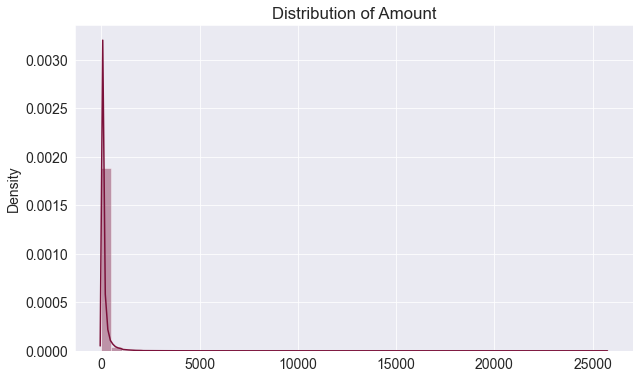

In [10]:
sns.distplot(data, x= data.Amount, color="#7B113A");
plt.title("Distribution of Amount");

So we will be scaling the feature in our next section `Data Preprocessing`.

<a id="4"></a>
# 4. Data Preprocessing

<a id="scl"></a>
## Feature Scaling

To scale the data, I will be using Robust Scaler Algortithm as it is robust to outliers. 

In [11]:
scaler = RobustScaler()

data['scaled_time'] = scaler.fit_transform(data.Time.values.reshape(-1,1))
data['scaled_amount'] = scaler.fit_transform(data.Amount.values.reshape(-1,1))

scaled_time = data['scaled_time']
scaled_amount = data['scaled_amount']



In [12]:
# dropping unscaled time and amount column and changing the position of scaled amount and time in next cell.
data.drop(["Time","Amount", "scaled_time", "scaled_amount"], axis=1, inplace=True)

In [13]:
data.insert(0, "Scaled_Time", scaled_time)
data.insert(1, "Scaled_Amount", scaled_amount)

In [14]:
data.head()

,Scaled_Time,Scaled_Amount,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,-0.994983,1.783274,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.994983,-0.269825,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,-0.994972,4.983721,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,-0.994972,1.418291,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,-0.994960,0.670579,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


As we can see, both Time and Amount columns have been scaled now.

<a id="timb"></a>
## Target Imbalance

So as we saw in the first section, that there is a huge imabalance in the target feature classes. Let's plot them once again.

<AxesSubplot:title={'center':'Distribute of Class (Target Feature)'}, xlabel='Class', ylabel='count'>

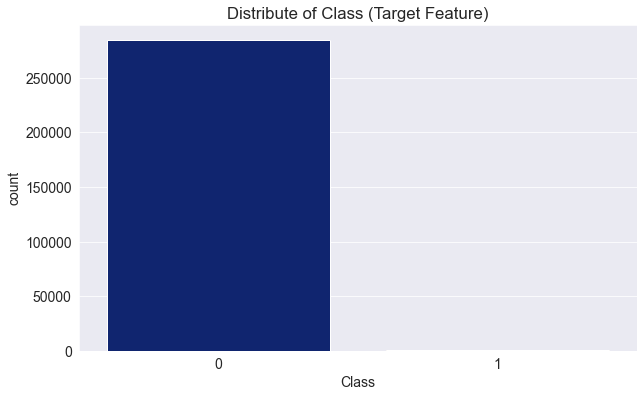

In [15]:
plt.title("Distribute of Class (Target Feature)")
sns.countplot(data=data, x=data.Class, palette="dark")

### Input and Target Features

In [16]:
X = data.drop("Class", axis=1)
y= data.Class

### Splitting dataset into training and testing set

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

We will perform `SMOTE` for the resampling.

In [18]:
smote = SMOTE(random_state=0)
X_train_s, y_train_s = smote.fit_resample(X_train, y_train)

In [19]:
from collections import Counter

print("Length of y_train before resampling", Counter(y_train))
print("Length of y_train after resampling", Counter(y_train_s))


Length of y_train before resampling Counter({0: 199019, 1: 345})
Length of y_train after resampling Counter({0: 199019, 1: 199019})


<AxesSubplot:xlabel='Class', ylabel='count'>

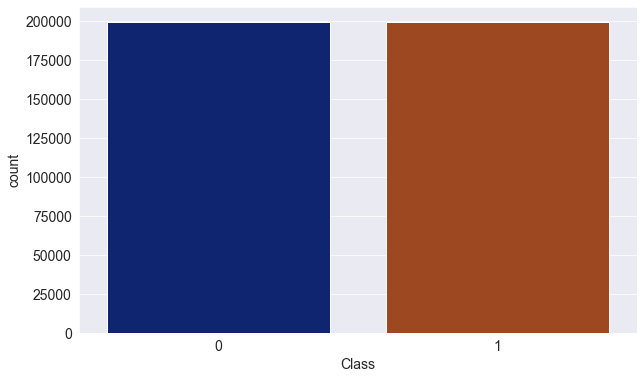

In [20]:
sns.countplot(x=y_train_s, data=data, palette="dark")

So now we have our balance target feature we can move ahead and perform model training.

<a id="5"></a>
# 5. Model Training, Testing and Tuning

**Few things to note here**

1. Since we have an imabalanced dataset, using accuracy score will not be a good performance matrix.
2. Instead we will be using metrics such as Precision, Recall, F1_Score and also Area Under the Precision-Recall Curve (AUPRC)

**Also explaination of few important terminology**


> - Recall of fraud cases (sensitivity)  summarizes true positive rate (True positive/True positive + False Negative)- how many cases we got correct out of all the positive ones.

> - Recall of non-fraud (specificity) summarizes true negative rate (True negative/True negative + False positive) - how many cases we got correct out of all the negative ones.

> - Precision of fraud cases (True positive/True positive + False positive) summarizes the accuracy of fraud cases detected - out of all predicted as fraud, how many are correct.

> - Precision of non-fraud cases (True negative/True negative + False negative) summarizes the accuracy of non-fraud cases detected - out of all predicted as non-fraud, how many are correct.

> - F1-score is the harmonic mean of recall and precision.



Let's first train our model with the imbalanced data and see how that performs.

In [21]:
model = LogisticRegression(random_state=42, solver='liblinear')
model.fit(X_train, y_train)

model_preds = model.predict(X_test)

In [22]:
print(classification_report(y_test, model_preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.88      0.62      0.73       147

    accuracy                           1.00     85443
   macro avg       0.94      0.81      0.86     85443
weighted avg       1.00      1.00      1.00     85443



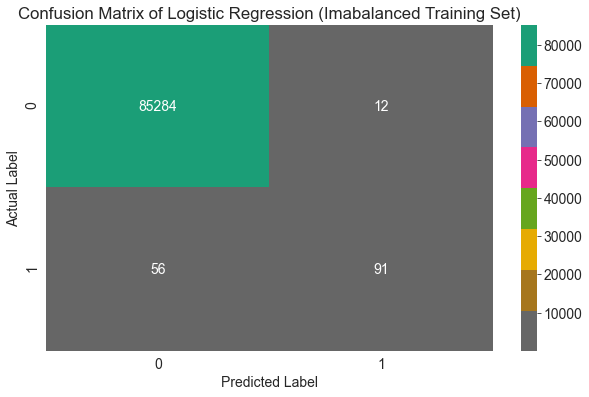

In [23]:
sns.heatmap(confusion_matrix(y_test, model_preds), cmap="Dark2_r", annot=True, fmt="g")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("Confusion Matrix of Logistic Regression (Imabalanced Training Set)");

As we can see this is not a good model. It is biased towards the majority class. Infact the recall of Fraud is just marginally better than any base line model. This is not a desired model.

### Now we will train the below models with SMOTE data



<a id="log"></a>
## Logistic Regression

In [24]:
model_log = LogisticRegression(random_state=42)
model_log.fit(X_train_s, y_train_s)

LogisticRegression(random_state=42)

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     85296
           1       0.06      0.92      0.11       147

    accuracy                           0.98     85443
   macro avg       0.53      0.95      0.55     85443
weighted avg       1.00      0.98      0.99     85443



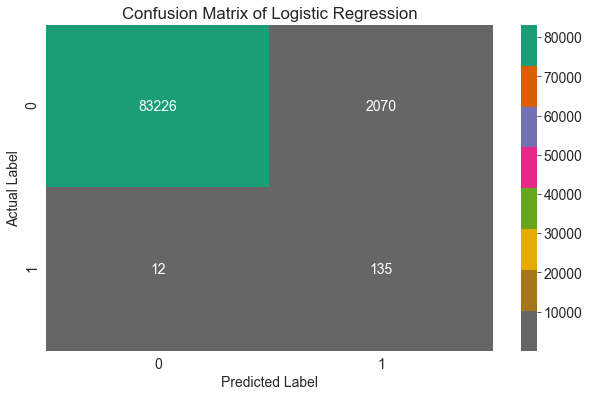

In [25]:
model_preds = model_log.predict(X_test)
print(classification_report(y_test, model_preds))
sns.heatmap(confusion_matrix(y_test, model_preds), annot=True, fmt='g', cmap="Dark2_r")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("Confusion Matrix of Logistic Regression");

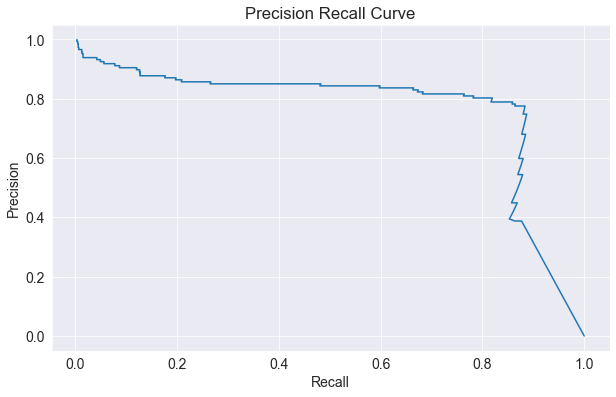

In [26]:
model_preds_prob = model_log.predict_proba(X_test)[:,1]
precision, recall, thresholds = precision_recall_curve(y_test, model_preds_prob)

# Plotting Precision Recall Curve

plt.plot(precision, recall)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision Recall Curve");


We got a high recall value which means our model will be able to detect the highest number of Fraud Transaction. However, the precision rate is quite low which means that it will classify a lot of Non Fraudulent transactions as Fraud. And this might be upset the customers and they might even churn.

<a id="rf"></a>
## Random Forests

Let's look at random forests now. See if that can give us better precision as well as recall.

In [30]:
rf_model = RandomForestClassifier(n_estimators=500, min_samples_split=10, min_samples_leaf=1,
           max_features='auto', max_leaf_nodes=None,
           oob_score=True, n_jobs=-1, random_state=1)

In [31]:
rf_model.fit(X_train_s,y_train_s)

RandomForestClassifier(min_samples_split=10, n_estimators=500, n_jobs=-1,
                       oob_score=True, random_state=1)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.93      0.82      0.87       147

    accuracy                           1.00     85443
   macro avg       0.97      0.91      0.94     85443
weighted avg       1.00      1.00      1.00     85443



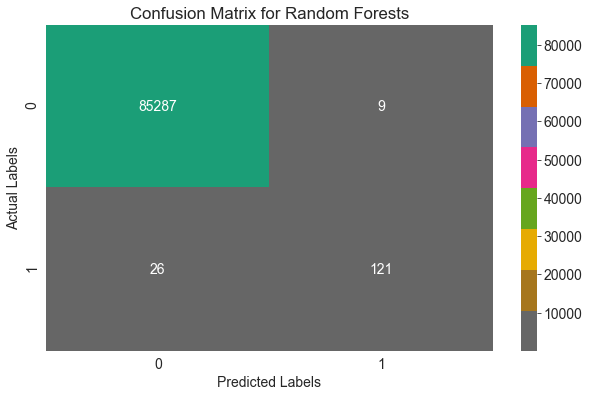

In [32]:
rf_model_preds = rf_model.predict(X_test)
print(classification_report(y_test, rf_model_preds))

sns.heatmap(confusion_matrix(y_test, rf_model_preds), annot=True, fmt='g', cmap="Dark2_r")
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.title("Confusion Matrix for Random Forests");

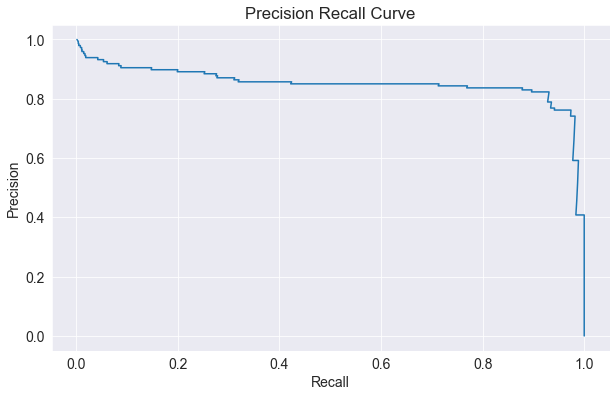

In [33]:
# plotting Precision Recall Curve

rf_model_probs = rf_model.predict_proba(X_test)[:,1]
precision, recall, threshold = precision_recall_curve(y_test, rf_model_probs)

plt.title("Precision Recall Curve")
plt.plot(precision, recall)
plt.xlabel("Recall")
plt.ylabel("Precision");

Our Random Forests overall outperformed the Logistic Regression. Indeed the recall value has decreased as compared to Logistic Regression, however, the precision value has increased significantly. This means that our model will now only classify really less number of Non Fraud Cases as Fraud. Yes this is a trade off , however, overall our model has improved significantly.


Even the f1_score has increased significantly.



**Let's also check the feature importances**

In [38]:
featureim_df = pd.DataFrame({"Feature": X_train_s.columns, "Importance": rf_model.feature_importances_})

In [39]:
new_feature = featureim_df.sort_values("Importance", ascending=False)

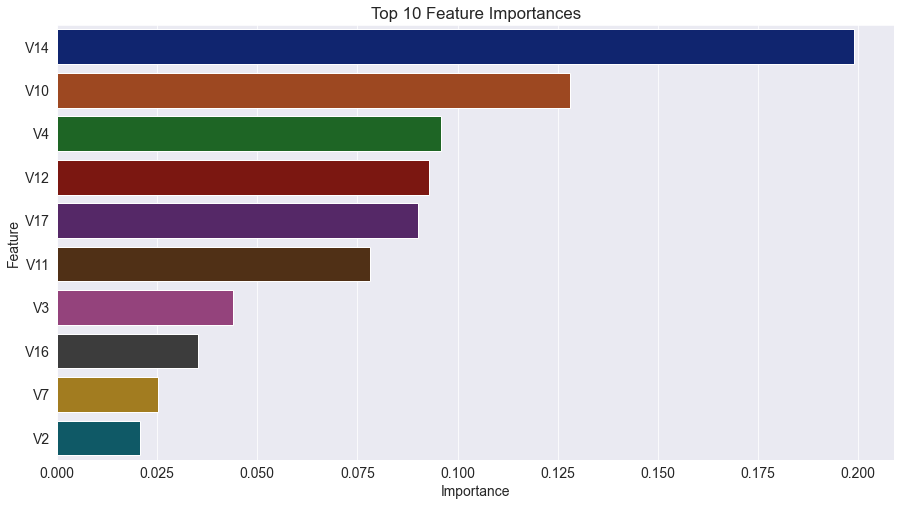

In [41]:
plt.figure(figsize=(15,8))
sns.barplot(data=new_feature.head(10), x="Importance", y="Feature", palette="dark");
plt.title("Top 10 Feature Importances");
plt.ylabel("Feature")
plt.xlabel("Importance");

<a id="xgb"></a>
## XGBoost

Let's try this with XG Boost too

In [43]:
xgb_model = XGBClassifier(n_estimators = 500, max_depth = 20, learning_rate = 0.01)
xgb_model.fit(X_train_s, y_train_s)

[02:25:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.01, max_delta_step=0, max_depth=20,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=500, n_jobs=16, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [44]:
xgb_preds = xgb_model.predict(X_test)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.73      0.82      0.77       147

    accuracy                           1.00     85443
   macro avg       0.87      0.91      0.89     85443
weighted avg       1.00      1.00      1.00     85443



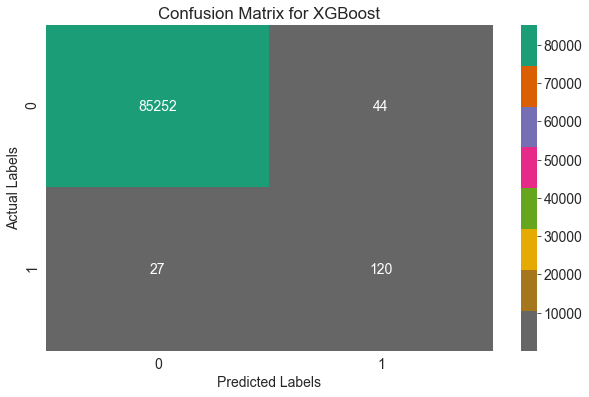

In [45]:
print(classification_report(y_test, xgb_preds))

sns.heatmap(confusion_matrix(y_test, xgb_preds), annot=True, fmt='g', cmap="Dark2_r")
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.title("Confusion Matrix for XGBoost");

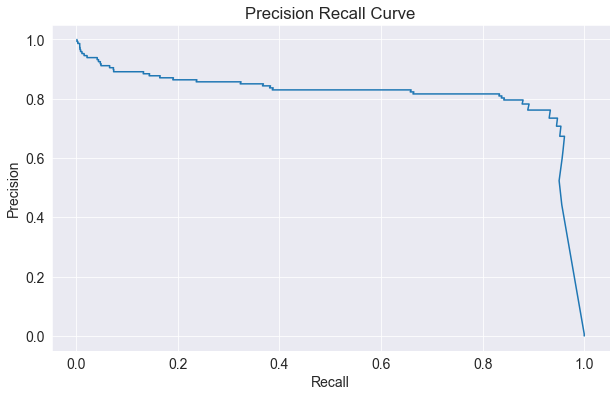

In [46]:
# plotting Precision Recall Curve

xgb_pred_probs = xgb_model.predict_proba(X_test)[:,1]
precision, recall, threshold = precision_recall_curve(y_test, xgb_pred_probs)

plt.title("Precision Recall Curve")
plt.plot(precision, recall)
plt.xlabel("Recall")
plt.ylabel("Precision");

The result of XGBoost is good but not better than Random Forests. Even though the recall value has stayed the same, the precision and f1_score has decreased. But it is still quite better than Logistic Regression

<a id="6"></a>
# 6. Conclusions

> 1. Irrespective of Imbalanced Dataset, we were able to achieve good scores.

> 2. It is recommended to improve the data collection process so that target feature classes can be equal.

> 3. Random Forests and XGBoost gave us the best result with Random Forest being on the top. They both were able to detect more than `80%` of the Fraudulent Transactions and at the same time not classifying a lot of non fraud classes as fraud.

> 4. As we saw that with Logistic Regression, the recall was the highest. However, the precision and the f1_score were both really poor. We had  to come up with a model where both recall and precision were good. So as we trained the model with Random Forests, the recall score decreased a little but the precision score shot up significantly. 

> 5. Hence there is no perfect model. There will always be such trade offs and we have to select which performance metric to give importance to depending on our usecase.